This code builds upon the previous code by introducing a loss function in the calculation of weighted scores for each attribute. The loss function is applied to the attribute values before multiplying them with their corresponding weights. The purpose of the loss function is to transform the attribute values in a way that emphasizes certain characteristics or preferences.

By applying the loss function, the code takes into account not only the weights of the attributes but also the specific shape of the loss function that represents the decision-maker's preferences. The specific loss function used in this code is a simple square function (x^2), which gives higher weight to attribute values that are closer to 1 and lower weight to values closer to 0.

After calculating the weighted scores with the loss function, the code proceeds with calculating the overall scores, ranking the options based on these scores, and abbreviating the vendor names. The ranked options are then saved to a CSV file. Finally, a utility curve is plotted to visualize the relationship between vendors and their utility scores, with the x-axis representing the abbreviated vendor names and the y-axis representing the utility scores.

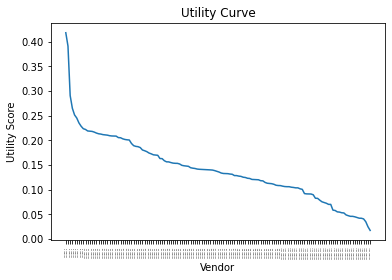

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the Excel file and skip the first row
data = pd.read_excel('Consolidated data.xlsx', skiprows=1)

# Remove first column
data = data.iloc[:, 1:]

# Remove the last two rows
data = data.iloc[:-2]

# Rename the columns
data.columns = ['S.no', 'Company', 'Vendor', 'IRR', 'Strategic fit', 'Technical Feasibility',
                'Uniqueness of R&D', 'Reputational risk', 'Market and Business risk',
                'Scalability', 'Regulatory risk', 'Market factors'] + data.columns[12:].tolist()

# Convert numeric columns to numeric data type
numeric_columns = ['IRR', 'Strategic fit', 'Technical Feasibility', 'Uniqueness of R&D',
                   'Reputational risk', 'Market and Business risk', 'Scalability',
                   'Regulatory risk', 'Market factors']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Convert the data to CSV format
data.to_csv('Consolidated data_normalized.csv', index=False)

# Read the normalized CSV file
data = pd.read_csv('Consolidated data_normalized.csv')

# Define the pairwise comparison matrix for criteria
criteria_matrix = np.array([
    [1, 3, 5, 3, 7, 9, 5, 7, 3],  # IRR compared to other criteria
    [1/3, 1, 3, 3, 7, 7, 5, 7, 3],  # Strategic fit compared to other criteria
    [1/5, 1/3, 1, 1/3, 3, 3, 3, 5, 1],  # Technical Feasibility compared to other criteria
    [1/3, 1/3, 3, 1, 5, 7, 5, 7, 3],  # Uniqueness of R&D compared to other criteria
    [1/7, 1/7, 1/3, 1/5, 1, 3, 3, 5, 1],  # Reputational risk compared to other criteria
    [1/9, 1/7, 1/3, 1/7, 1/3, 1, 1/3, 1, 1/3],  # Market and Business risk compared to other criteria
    [1/5, 1/5, 1/3, 1/5, 1/3, 3, 1, 3, 1/3],  # Scalability compared to other criteria
    [1/7, 1/7, 1/5, 1/7, 1/5, 1, 1/3, 1, 1/5],  # Regulatory risk compared to other criteria
    [1/3, 1/3, 1, 1/3, 1, 3, 3, 5, 1]  # Market factors compared to other criteria
])

# Perform weight calculation
weights = np.power(np.prod(criteria_matrix, axis=1), 1 / criteria_matrix.shape[0])
weights = weights / np.sum(weights)

# Assign the calculated weights to the attributes
weights_dict = dict(zip(data.columns[3:12], weights))

# Calculate weighted scores for each attribute
for attribute in weights_dict:
    data[attribute + '_weighted'] = data[attribute].apply(lambda x: x ** 2) * weights_dict[attribute]

# Calculate overall scores
data['overall_score'] = data.filter(like='_weighted').sum(axis=1)

# Rank options based on overall scores
ranked_data = data.sort_values('overall_score', ascending=False)

# Abbreviate vendor names
abbreviated_names = ['Vendor {}'.format(i + 1) for i in range(len(ranked_data))]
ranked_data['Abbreviated Vendor'] = abbreviated_names

# Save ranked options to CSV
ranked_data[['S.no', 'Company', 'Vendor', 'Abbreviated Vendor', 'overall_score']].to_csv('Ranked Options.csv', index=False)
output = pd.read_csv('Ranked Options.csv')

# Plot utility curve
plt.plot(output['Abbreviated Vendor'], output['overall_score'])
plt.xlabel('Vendor')
plt.ylabel('Utility Score')
plt.title('Utility Curve')
plt.xticks(rotation=90,fontsize=2)
plt.show()

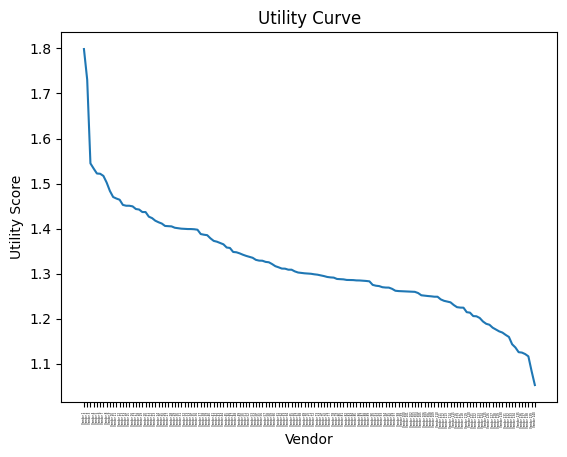

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the Excel file and skip the first row
data = pd.read_excel('/content/drive/MyDrive/MAUT/Consolidated data.xlsx', skiprows=1)

# Remove first column
data = data.iloc[:, 1:]

# Remove the last two rows
data = data.iloc[:-2]

# Rename the columns
data.columns = ['S.no', 'Company', 'Vendor', 'IRR', 'Strategic fit', 'Technical Feasibility',
                'Uniqueness of R&D', 'Reputational risk', 'Market and Business risk',
                'Scalability', 'Regulatory risk', 'Market factors'] + data.columns[12:].tolist()

# Convert numeric columns to numeric data type
numeric_columns = ['IRR', 'Strategic fit', 'Technical Feasibility', 'Uniqueness of R&D',
                   'Reputational risk', 'Market and Business risk', 'Scalability',
                   'Regulatory risk', 'Market factors']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply Min-Max normalization to the numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Convert the data to CSV format
data.to_csv('/content/drive/MyDrive/MAUT/Consolidated data_normalized.csv', index=False)

# Read the normalized CSV file
data = pd.read_csv('/content/drive/MyDrive/MAUT/Consolidated data_normalized.csv')

# Define the pairwise comparison matrix for criteria
criteria_matrix = np.array([
    [1, 3, 5, 3, 7, 9, 5, 7, 3],  # IRR compared to other criteria
    [1/3, 1, 3, 3, 7, 7, 5, 7, 3],  # Strategic fit compared to other criteria
    [1/5, 1/3, 1, 1/3, 3, 3, 3, 5, 1],  # Technical Feasibility compared to other criteria
    [1/3, 1/3, 3, 1, 5, 7, 5, 7, 3],  # Uniqueness of R&D compared to other criteria
    [1/7, 1/7, 1/3, 1/5, 1, 3, 3, 5, 1],  # Reputational risk compared to other criteria
    [1/9, 1/7, 1/3, 1/7, 1/3, 1, 1/3, 1, 1/3],  # Market and Business risk compared to other criteria
    [1/5, 1/5, 1/3, 1/5, 1/3, 3, 1, 3, 1/3],  # Scalability compared to other criteria
    [1/7, 1/7, 1/5, 1/7, 1/5, 1, 1/3, 1, 1/5],  # Regulatory risk compared to other criteria
    [1/3, 1/3, 1, 1/3, 1, 3, 3, 5, 1]  # Market factors compared to other criteria
])

# Perform weight calculation
weights = np.power(np.prod(criteria_matrix, axis=1), 1 / criteria_matrix.shape[0])
weights = weights / np.sum(weights)

# Assign the calculated weights to the attributes
weights_dict = dict(zip(data.columns[3:12], weights))

# Calculate weighted scores for each attribute using the exponential utility function
a = 1  # Rate of increase in the utility function
for attribute in weights_dict:
    data[attribute + '_utility'] = np.exp(a * data[attribute]) * weights_dict[attribute]

# Calculate overall scores
data['overall_score'] = data.filter(like='_utility').sum(axis=1)

# Rank options based on overall scores
ranked_data = data.sort_values('overall_score', ascending=False)

# Abbreviate vendor names
abbreviated_names = ['Vendor {}'.format(i + 1) for i in range(len(ranked_data))]
ranked_data['Abbreviated Vendor'] = abbreviated_names

# Save ranked options to CSV
ranked_data[['S.no', 'Company', 'Vendor', 'Abbreviated Vendor', 'overall_score']].to_csv('/content/drive/MyDrive/MAUT/Ranked Options.csv', index=False)
output = pd.read_csv('/content/drive/MyDrive/MAUT/Ranked Options.csv')

# Plot utility curve
plt.plot(output['Abbreviated Vendor'], output['overall_score'])
plt.xlabel('Vendor')
plt.ylabel('Utility Score')
plt.title('Utility Curve')
plt.xticks(rotation=90, fontsize=2)
plt.show()


In [ ]:
# exponential